In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

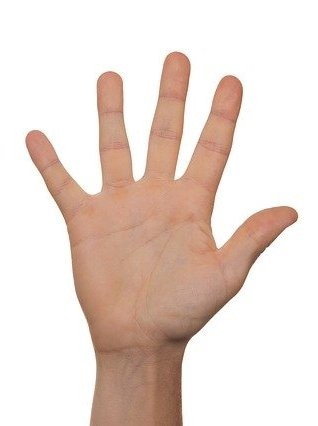

In [2]:
img_path = "/content/palm1.jpeg"
img = cv.imread(img_path)
cv2_imshow(img)

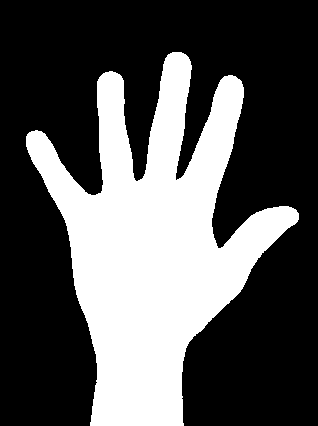

In [3]:
hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
skinRegionHSV = cv.inRange(hsvim, lower, upper)
blurred = cv.blur(skinRegionHSV, (2,2))
ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
cv2_imshow(thresh)

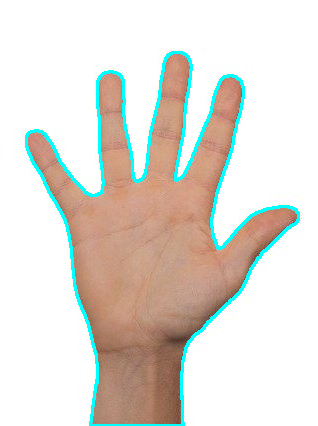

In [4]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv.contourArea(x))
cv.drawContours(img, [contours], -1, (255,255,0), 2)
cv2_imshow(img)

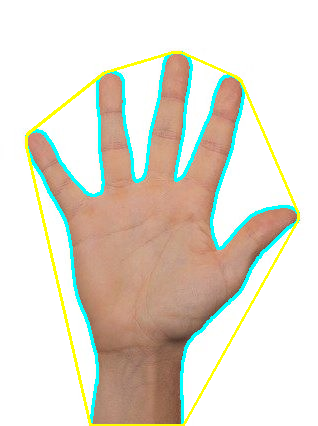

In [6]:
hull = cv.convexHull(contours)
cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
cv2_imshow(img)

In [7]:
hull = cv.convexHull(contours, returnPoints=False)
defects = cv.convexityDefects(contours, hull)

In [8]:
if defects is not None:
  cnt = 0
for i in range(defects.shape[0]):  # calculate the angle
  s, e, f, d = defects[i][0]
  start = tuple(contours[s][0])
  end = tuple(contours[e][0])
  far = tuple(contours[f][0])
  a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
  b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
  c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
  angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  #      cosine theorem
  if angle <= np.pi / 2:  # angle less than 90 degree, treat as fingers
    cnt += 1
    cv.circle(img, far, 4, [0, 0, 255], -1)
if cnt > 0:
  cnt = cnt+1
cv.putText(img, str(cnt), (0, 50), cv.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0) , 2, cv.LINE_AA)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

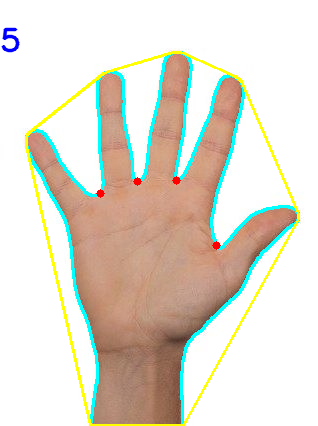

In [10]:
cv2_imshow(img)